# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # Give server 1 second break in between each iteration
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | yarmouth
Processing Record 3 of Set 1 | alotau
City not found. Skipping...
Processing Record 4 of Set 1 | berezovyy
Processing Record 5 of Set 1 | nar'yan-mar
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | grand baie
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | qarauyl
Processing Record 10 of Set 1 | namibe
Processing Record 11 of Set 1 | phan rang-thap cham
Processing Record 12 of Set 1 | saipan
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | melekeok village
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1 | vorgashor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()


City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,26.85,59,40,4.02,US,1682975166
1,yarmouth,41.7057,-70.2286,15.64,68,0,7.20,US,1682975290
2,berezovyy,51.6667,135.7000,6.52,65,100,2.28,RU,1682975292
3,nar'yan-mar,67.6713,53.0870,1.46,97,100,8.41,RU,1682975293
4,port-aux-francais,-49.3500,70.2167,3.33,68,32,7.78,TF,1682975295


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,26.85,59,40,4.02,US,1682975166
1,yarmouth,41.7057,-70.2286,15.64,68,0,7.20,US,1682975290
2,berezovyy,51.6667,135.7000,6.52,65,100,2.28,RU,1682975292
3,nar'yan-mar,67.6713,53.0870,1.46,97,100,8.41,RU,1682975293
4,port-aux-francais,-49.3500,70.2167,3.33,68,32,7.78,TF,1682975295


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

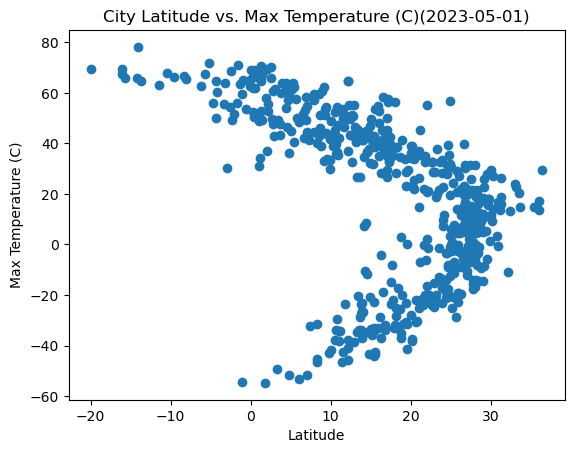

In [8]:
import datetime as dt
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (C)" + "(" + str(dt.datetime.now().date()) +")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
The above plot shows the maximum temperature for different cities depending on their distance from the equator towards North and South. There is a strong correlation between the temperature and latitude on both hemispheres.

#### Latitude Vs. Humidity

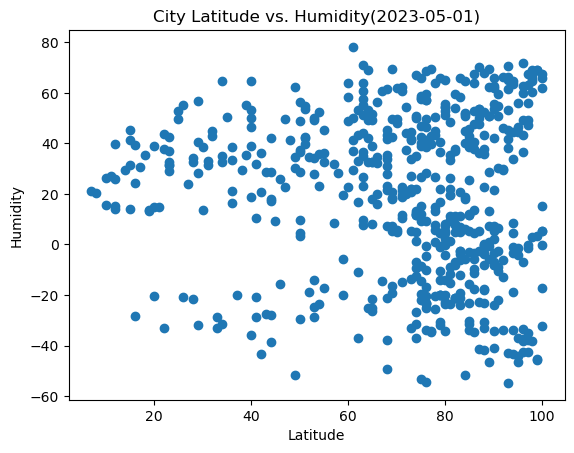

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity" + "(" +str(dt.datetime.now().date()) +")")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [ ]:
The above plot shows that there are high levels of humidity next to the equator.

#### Latitude Vs. Cloudiness

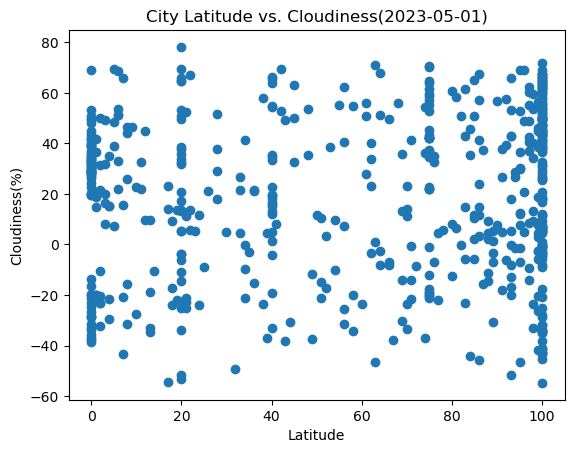

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness" + "(" + str(dt.datetime.now().date()) + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [ ]:
The above plot shows that there isn't correlation between cloudiness and latitude.

#### Latitude vs. Wind Speed Plot

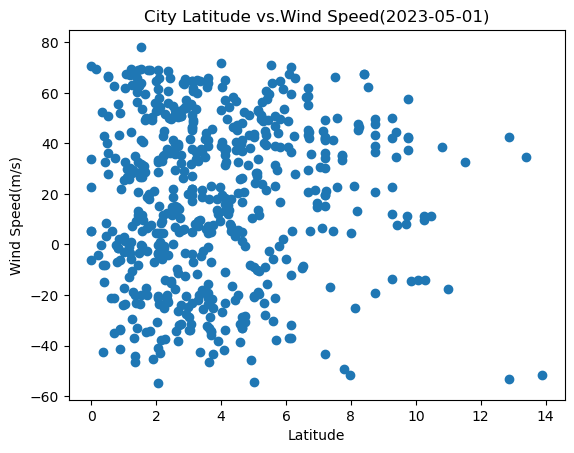

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.title("City Latitude vs.Wind Speed" +"(" + str(dt.datetime.now().date()) + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [ ]:
The above plot shows that there is little to no correlation between wind speed and latitude on both hemispheres.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,26.85,59,40,4.02,US,1682975166
1,yarmouth,41.7057,-70.2286,15.64,68,0,7.20,US,1682975290
2,berezovyy,51.6667,135.7000,6.52,65,100,2.28,RU,1682975292
3,nar'yan-mar,67.6713,53.0870,1.46,97,100,8.41,RU,1682975293
7,qarauyl,48.9451,79.2550,1.00,50,97,6.07,KZ,1682975298


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,3.33,68,32,7.78,TF,1682975295
5,grand baie,-20.0182,57.5802,24.69,79,1,1.34,MU,1682975244
6,adamstown,-25.0660,-130.1015,25.23,76,20,8.14,PN,1682975297
8,namibe,-15.1961,12.1522,22.95,81,36,2.47,AO,1682975299
13,puerto natales,-51.7236,-72.4875,4.74,84,93,7.97,CL,1682975278


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8487193664625174


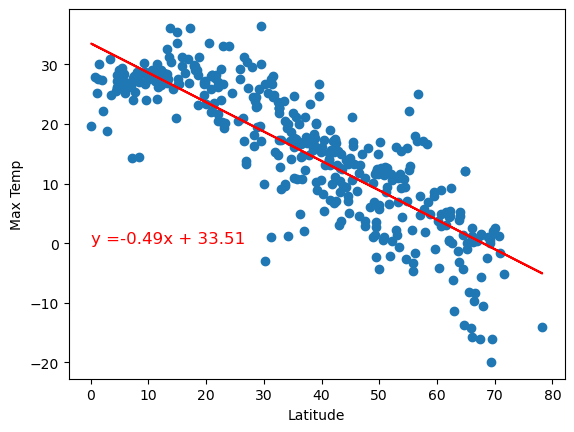

In [17]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (0, 0))


In [ ]:
There is strong correlation between the latitude and maximum temperature on the Northern Hemisphere, as latitude increases, maximum temperature decreases.


The r-value is: 0.8151110399971476


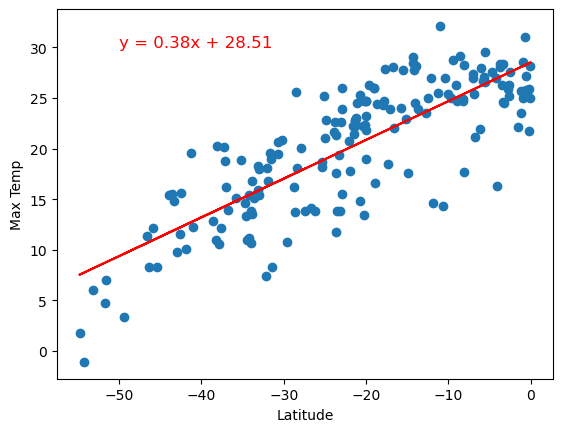

In [18]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-50, 30))

**Discussion about the linear relationship:** 
There is a positive correlation between maximum temperature and a latitude on the Southern Hemisphere. As the latitude increases/ gets closer to the equator, the maximum temperature increases. The Southern Hemisphere's maximum temperature variance is greater than the Northern Hemisphere's and there's a broader maximum temperature variation for different cities positioned on the same latitude on the Southern Hemisphere too.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12714609369489444


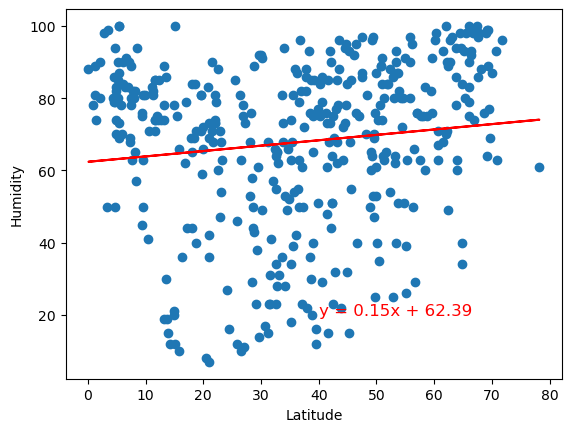

In [19]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (40, 20))


The r-value is: 0.13309567878005693


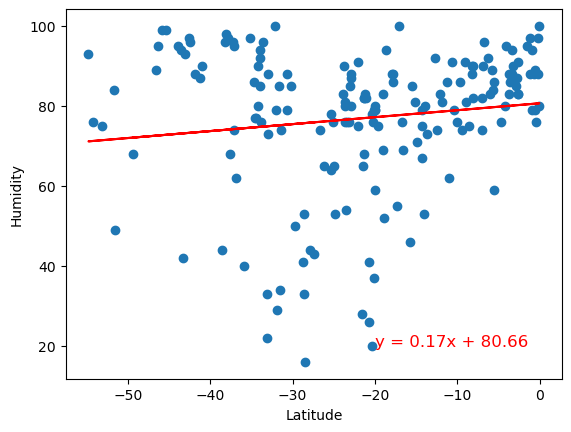

In [20]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 20))

**Discussion about the linear relationship:** 
There is almost no correlation between the humidity level and latitude for the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11834439210893971


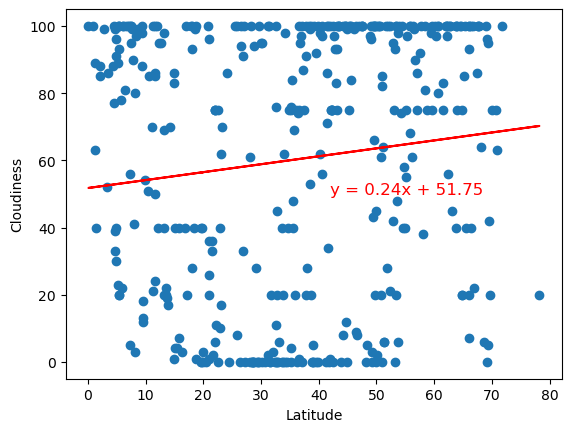

In [21]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

In [ ]:
There is no correlation between cloudiness and latitude on the Northern Hemisphere. Cloudiness levels are scatttered across all latitudes.

The r-value is: 0.1612919403201426


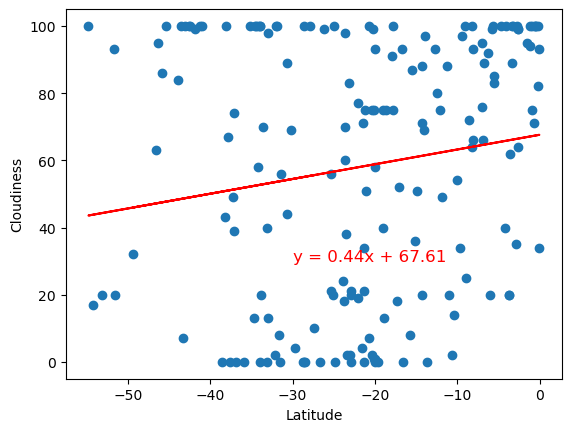

In [22]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-30, 30))

In [ ]:
There is no correlation between cloudiness and latitude on the Southern Hemisphere. Cloudiness levels ranges from 0% to 100%.

**Discussion about the linear relationship:**


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.012216009728316993


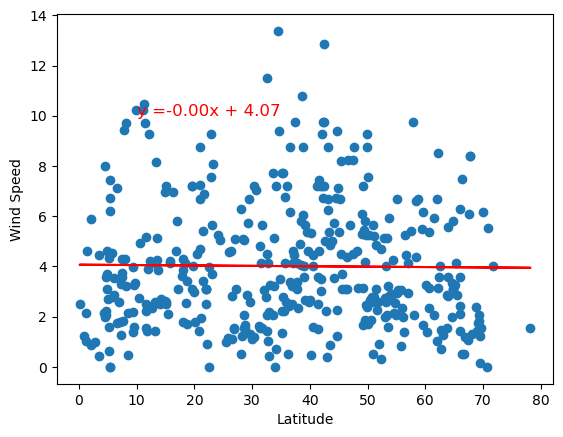

In [23]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 10))


In [ ]:
There is very low correlation between the wind speed and latitude on the Northern Hemisphere. The majority of cities on the Northern Hemisphere have wind speed levels ranging between 0 mph and 20 mph.

The r-value is: -0.20642917479466374


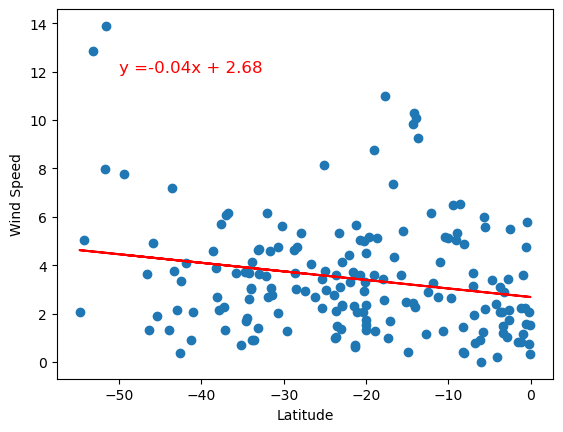

In [24]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50,12))

In [ ]:
There is very low negative correlation between wind speed and latitude on the Southern Hemisphere. As the latitude decreases away from the equator, the wind speed lightly increases.